<a href="https://colab.research.google.com/github/naomileon/-th-digraph-in-Dublin/blob/main/HIEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Corrélation Pearson Q18 vs HIE: 0.502 p = 0.0034
Corrélation Spearman Q18 vs HIE: 0.571 p = 0.0006
Corrélation Pearson Q18 vs HIEF: 0.123 p = 0.5032
Corrélation Spearman Q18 vs HIEF: 0.093 p = 0.6114

Différence entre r (HIE vs HIEF) : z = 1.63, p = 0.1025


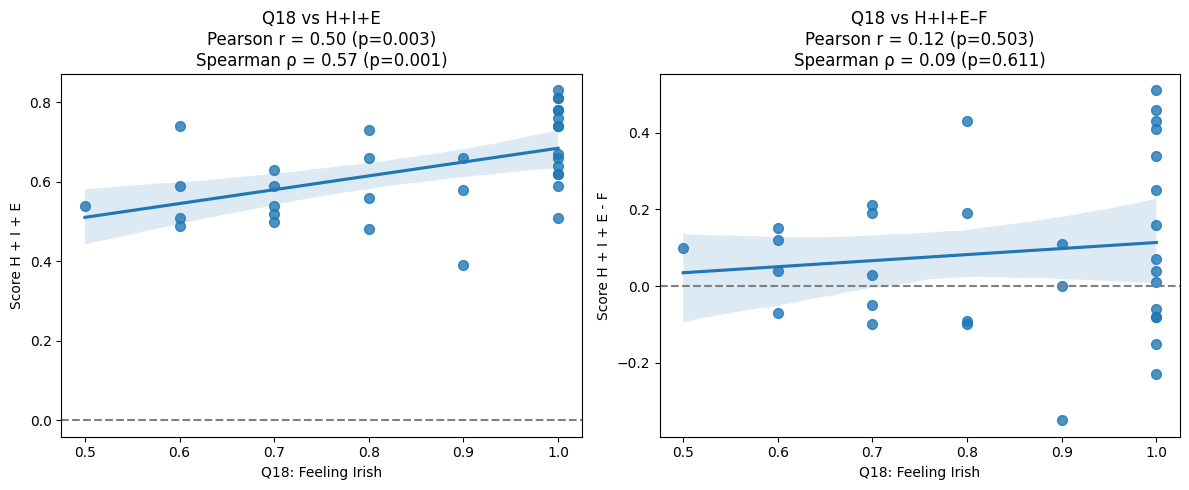

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
import scipy.stats  # ✅ Import nécessaire pour norm.cdf

# === Données ===
q18 = [
    0.9, 1.0, 1.0, 0.8, 0.7, 0.9, 0.7, 1.0, 0.8, 1.0,
    0.6, 0.8, 1.0, 0.9, 1.0, 1.0, 0.7, 1.0, 0.7, 1.0,
    0.8, 0.7, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 0.5, 0.6, 0.6, 1
]

score_hie = [
    0.39, 0.64, 0.74, 0.56, 0.52, 0.58, 0.50, 0.59,
    0.48, 0.67, 0.59, 0.73, 0.66, 0.66, 0.62, 0.81,
    0.54, 0.51, 0.59, 0.76, 0.66, 0.63, 0.78, 0.83,
    0.78, 0.74, 0.49, 0.62, 0.54, 0.51, 0.74, 0.81
]

score_hief = [
    -0.35, -0.06, 0.04, 0.19, -0.05, 0.11, -0.10, 0.16,
    -0.09, 0.34, -0.07, 0.43, -0.08, 0, -0.15, 0.51,
    0.21, -0.23, 0.03, 0.46, -0.10, 0.19, 0.41, 0.43,
    0.25, 0.07, 0.12, -0.08, 0.10, 0.15, 0.04, 0.01
]

# === DataFrame ===
df = pd.DataFrame({
    "Q18": q18,
    "HIE": score_hie,
    "HIEF": score_hief
})

# === Corrélations ===
r_hie, p_hie = pearsonr(df["Q18"], df["HIE"])
rho_hie, p_s_hie = spearmanr(df["Q18"], df["HIE"])
r_hief, p_hief = pearsonr(df["Q18"], df["HIEF"])
rho_hief, p_s_hief = spearmanr(df["Q18"], df["HIEF"])

print("Corrélation Pearson Q18 vs HIE:", round(r_hie, 3), "p =", round(p_hie, 4))
print("Corrélation Spearman Q18 vs HIE:", round(rho_hie, 3), "p =", round(p_s_hie, 4))
print("Corrélation Pearson Q18 vs HIEF:", round(r_hief, 3), "p =", round(p_hief, 4))
print("Corrélation Spearman Q18 vs HIEF:", round(rho_hief, 3), "p =", round(p_s_hief, 4))

# === Comparaison des deux corrélations de Pearson (approximation de Steiger) ===
def compare_pearson_corrs(r1, r2, n):
    zr1 = np.arctanh(r1)
    zr2 = np.arctanh(r2)
    se_diff = np.sqrt(2 / (n - 3))
    z = (zr1 - zr2) / se_diff
    p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))
    return z, p

z, p_diff = compare_pearson_corrs(r_hie, r_hief, len(df))
print(f"\nDifférence entre r (HIE vs HIEF) : z = {z:.2f}, p = {p_diff:.4f}")

# === Visualisation ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x="Q18", y="HIE", data=df, scatter_kws={"s": 50})
plt.title(f"Q18 vs H+I+E\nPearson r = {r_hie:.2f} (p={p_hie:.3f})\nSpearman ρ = {rho_hie:.2f} (p={p_s_hie:.3f})")
plt.axhline(0, linestyle="--", color="grey")
plt.xlabel("Q18: Feeling Irish")
plt.ylabel("Score H + I + E")

plt.subplot(1, 2, 2)
sns.regplot(x="Q18", y="HIEF", data=df, scatter_kws={"s": 50})
plt.title(f"Q18 vs H+I+E–F\nPearson r = {r_hief:.2f} (p={p_hief:.3f})\nSpearman ρ = {rho_hief:.2f} (p={p_s_hief:.3f})")
plt.axhline(0, linestyle="--", color="grey")
plt.xlabel("Q18: Feeling Irish")
plt.ylabel("Score H + I + E - F")

plt.tight_layout()
plt.show()

